# Bolly Band


In [1]:
import fxcmpy
import pandas as pd
import numpy as np
import datetime as dt


from pyti.stochastic import percent_k
from pyti.stochastic import percent_d
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
socket = fxcmpy.fxcmpy(config_file = 'config.cfg')

In [32]:
data = socket.get_candles(instrument = 'GBP/USD', period = 'D1', start = dt.datetime(2015,1,1), end = dt.datetime(2018, 6, 10))

In [33]:
data['percent_k'] = percent_k(data['askclose'], 20)
data['percent_d'] = percent_d(data['askclose'], 20)

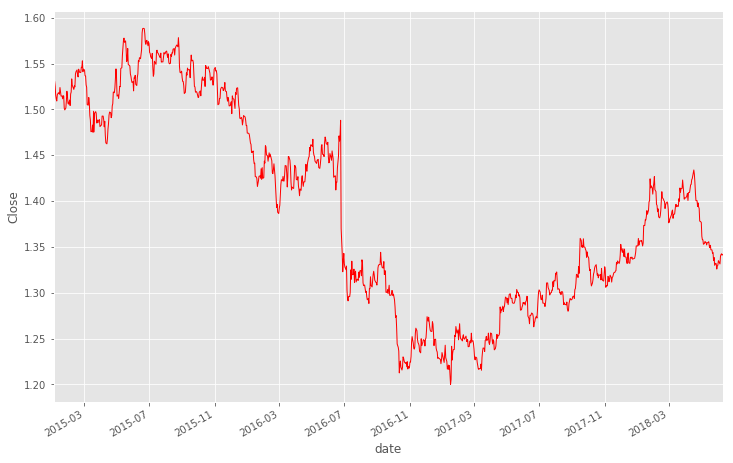

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111,  xlabel = 'Date',ylabel='Close')
data['askclose'].plot(ax=ax1, color='r', lw=1)

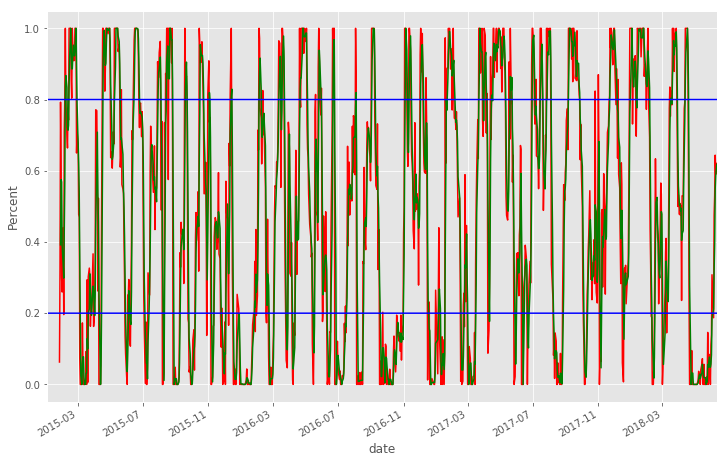

In [35]:
ss_plot = plt.figure(figsize=(12,8))
ax3 = ss_plot.add_subplot(111,  ylabel='Percent')
data['percent_k'].plot(ax=ax3, color='r')
data['percent_d'].plot(ax=ax3, color='g')
data['ovr'] = .80
data['ovr'].plot(ax=ax3, color = 'b', )
data['blw'] = .20
data['blw'].plot(ax=ax3, color = 'b',)


In [36]:

data['signal'] = np.where(np.logical_and(data['percent_k'] > data['percent_d'], data['percent_k']>.8),1,0)
data['position'] = data['signal'].diff()
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,percent_k,percent_d,ovr,blw,signal,position
date,,,,,,,,,,,,,,,
2015-01-02 22:00:00,1.55743,1.53253,1.55568,1.53245,1.55776,1.53300,1.55592,1.53281,191340,NaN,NaN,0.8,0.2,0,NaN
2015-01-04 22:00:00,1.53253,1.53015,1.53337,1.52938,1.53300,1.53062,1.53396,1.53027,1926,NaN,NaN,0.8,0.2,0,0.0
2015-01-05 22:00:00,1.53015,1.52446,1.53190,1.51802,1.53062,1.52508,1.53213,1.51900,278410,NaN,NaN,0.8,0.2,0,0.0
2015-01-06 22:00:00,1.52446,1.51500,1.52730,1.51406,1.52508,1.51529,1.52748,1.51422,276782,NaN,NaN,0.8,0.2,0,0.0
2015-01-07 22:00:00,1.51500,1.51092,1.51549,1.50538,1.51529,1.51121,1.51564,1.50555,307334,NaN,NaN,0.8,0.2,0,0.0
2015-01-08 22:00:00,1.51092,1.50834,1.51172,1.50336,1.51121,1.50914,1.51186,1.50352,239849,NaN,NaN,0.8,0.2,0,0.0
2015-01-09 22:00:00,1.50834,1.51559,1.51753,1.50767,1.50914,1.51601,1.51771,1.50784,295386,NaN,NaN,0.8,0.2,0,0.0
2015-01-11 22:00:00,1.51559,1.51751,1.51834,1.51730,1.51601,1.51820,1.51880,1.51800,919,NaN,NaN,0.8,0.2,0,0.0
2015-01-12 22:00:00,1.51751,1.51706,1.51932,1.50981,1.51820,1.51754,1.51956,1.50996,209905,NaN,NaN,0.8,0.2,0,0.0


In [38]:
pip_cost = .09
lot_size = 100
begin_prices = []
end_prices = []
profits = 0

# Finding when a position is initiated and getting the open / close prices for the position
for i, row in data.iterrows():
    if row['position'] == 1:
        begin_prices.append(float(row['askopen']))
    if row['position'] == -1:
        end_prices.append(float(row['askopen']))

# Calculating the profit / loss using our pip cost and lot size
for i in range(len(begin_prices)):
    profit = (end_prices[i] - begin_prices[i]) * 100 * pip_cost * lot_size
    profits += profit
    print("The return for trade " + str(i + 1) + " is: " + str(int(profit)))
    

print("The return for the period is: " + str(int(profits)))

The return for trade 1 is: 14
The return for trade 2 is: 14
The return for trade 3 is: 5
The return for trade 4 is: 5
The return for trade 5 is: 11
The return for trade 6 is: 11
The return for trade 7 is: 14
The return for trade 8 is: 18
The return for trade 9 is: 11
The return for trade 10 is: 7
The return for trade 11 is: 3
The return for trade 12 is: 2
The return for trade 13 is: 7
The return for trade 14 is: 8
The return for trade 15 is: 9
The return for trade 16 is: 2
The return for trade 17 is: 19
The return for trade 18 is: 1
The return for trade 19 is: 13
The return for trade 20 is: 6
The return for trade 21 is: 16
The return for trade 22 is: 4
The return for trade 23 is: 8
The return for trade 24 is: 20
The return for trade 25 is: 10
The return for trade 26 is: 13
The return for trade 27 is: 5
The return for trade 28 is: 7
The return for trade 29 is: 1
The return for trade 30 is: 19
The return for trade 31 is: 2
The return for trade 32 is: 35
The return for trade 33 is: 12
The